# Digital Image Processing Lab

### MTH Junaidi, AP17110010074, CSE B

### Lab 06 : Frequency Domain Filtering

In [48]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [49]:
lena = mpimg.imread("lena.png")

In [50]:
temp1 =[]
temp2 = []
for i in range(256):
    for j in range(256):
        temp2.append(sum(lena[i][j])/3)
    temp1.append(temp2)
    temp2 =[]

In [51]:
lena = np.array(temp1)

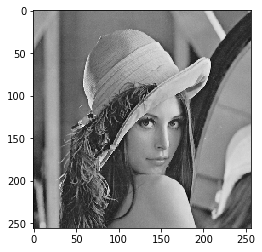

In [52]:
plt.imshow(lena, cmap='gray')

In [53]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

In [54]:
def ideal_LowPass(D0, image_shape):
    new = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2, cols/2)
    
    for v in range(cols):
        for u in range(rows):
            if distance((u,v), center) < D0:
                new[u,v] = 1
    return new

In [55]:
lena.max()

1.0

In [56]:
lena = lena*256
lena.max()

256.0

In [57]:
Ideal_Low_Pass = ideal_LowPass(50, lena.shape)

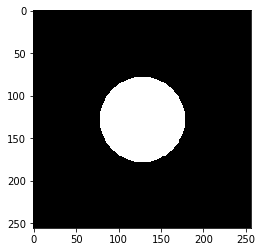

In [58]:
plt.imshow(Ideal_Low_Pass, cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x12931acd0>,
 <matplotlib.image.AxesImage at 0x12aed4c50>)

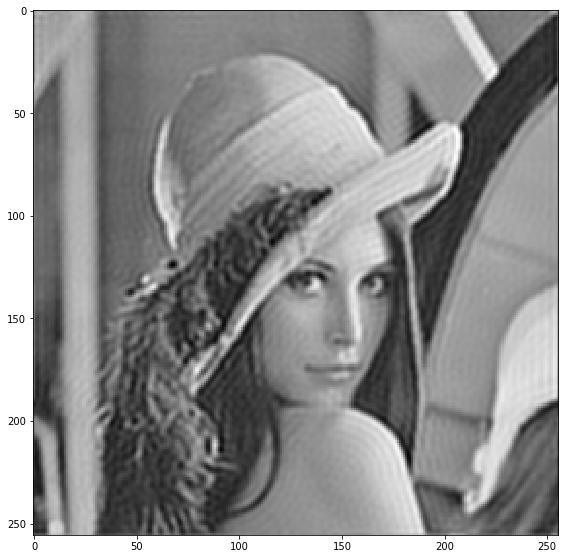

In [66]:
original = np.fft.fft2(lena)          #Fourier Transform of the image
center = np.fft.fftshift(original)   #Shifting the zero-frequency component to the center of the spectrum
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Ideal Low Pass Filter
LowPassCenter = center * ideal_LowPass(60,lena.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
Low_pass_lena = np.abs(inverse_LowPass)
plt.subplot(131),plt.imshow(Low_pass_lena, "gray")


In [67]:
def butterworth_LowPass(D0, image_shape, n):      #n = order of filter
    new = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2, cols/2)
    
    for v in range(cols):
        for u in range(rows):
            new[u,v] = 1/(1+(distance((u,v), center)/D0)**(2*n))
    return new

In [68]:
butter_worth_low_pass = butterworth_LowPass(50, lena.shape, 5)

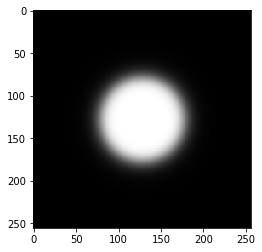

In [69]:
plt.imshow(butter_worth_low_pass, cmap='gray')

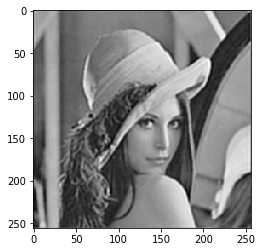

In [71]:
LowPassCenter = center * butterworth_LowPass(60,lena.shape,5)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray")


In [72]:
def gaussian_LowPass(D0, image_shape):
    new = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2, cols/2)
    
    for v in range(cols):
        for u in range(rows):
            new[u,v] = np.exp(((-distance((u,v), center)**2)/(2*(D0**2))))
    return new

In [73]:
gaussian_low_pass = gaussian_LowPass(50, lena.shape)

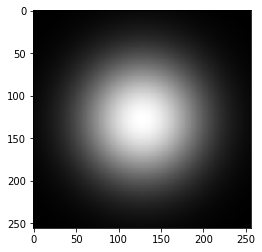

In [74]:
plt.imshow(gaussian_low_pass, cmap='gray')

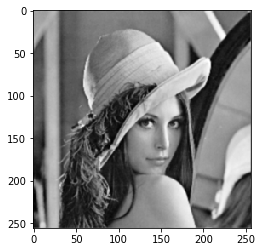

In [77]:
LowPassCenter = center * gaussian_LowPass(60,lena.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray")


## 1.b ) Ringing effect

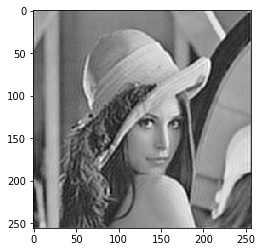

In [80]:
LowPassCenter = center * ideal_LowPass(60,lena.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray")

## 1.c Butterworth Low pass filter with different cutoffs

(<matplotlib.image.AxesImage at 0x1303bbb50>,
 Text(0.5, 1.0, 'Butterworth Low Pass (Cut-off Frequency = 5)'))

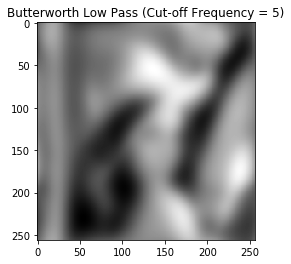

In [83]:
#cut-off Frequency = 5
LowPassCenter = center * butterworth_LowPass(5,lena.shape,2)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (Cut-off Frequency = 5)")



(<matplotlib.image.AxesImage at 0x13254fd10>,
 Text(0.5, 1.0, 'Butterworth Low Pass (Cut-off Frequency = 5)'))

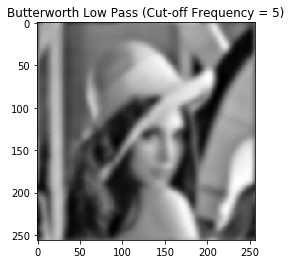

In [84]:
#cut-off Frequency = 15
LowPassCenter = center * butterworth_LowPass(15,lena.shape,2)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (Cut-off Frequency = 5)")



(<matplotlib.image.AxesImage at 0x130723e90>,
 Text(0.5, 1.0, 'Butterworth Low Pass (Cut-off Frequency = 5)'))

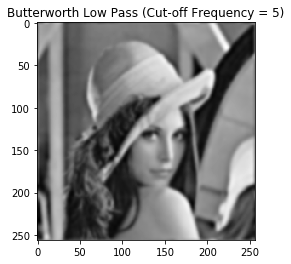

In [85]:
#cut-off Frequency = 30
LowPassCenter = center * butterworth_LowPass(30,lena.shape,2)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (Cut-off Frequency = 5)")



(<matplotlib.image.AxesImage at 0x1327bc090>,
 Text(0.5, 1.0, 'Butterworth Low Pass (Cut-off Frequency = 5)'))

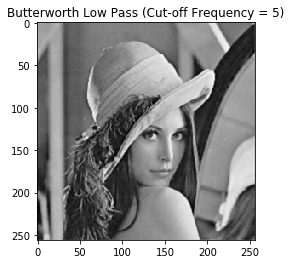

In [86]:
#cut-off Frequency = 90
LowPassCenter = center * butterworth_LowPass(90,lena.shape,2)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (Cut-off Frequency = 5)")



(<matplotlib.image.AxesImage at 0x132902210>,
 Text(0.5, 1.0, 'Butterworth Low Pass (Cut-off Frequency = 5)'))

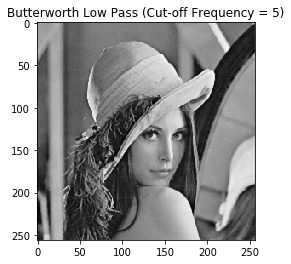

In [87]:
#cut-off Frequency = 120
LowPassCenter = center * butterworth_LowPass(120,lena.shape,2)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (Cut-off Frequency = 5)")



## 1.d Gaussian Low pass filter with different cutoffs

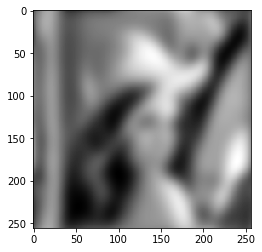

In [90]:
#cut-off Frequency = 5
LowPassCenter = center * gaussian_LowPass(5,lena.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray")


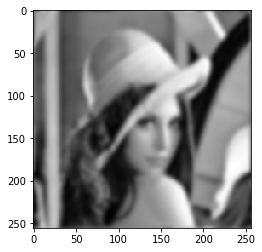

In [91]:
#cut-off Frequency = 15
LowPassCenter = center * gaussian_LowPass(15,lena.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray")


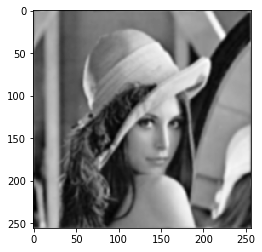

In [92]:
#cut-off Frequency = 30
LowPassCenter = center * gaussian_LowPass(30,lena.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray")


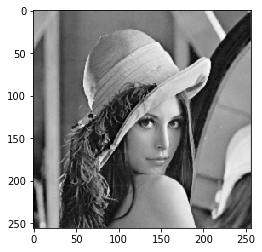

In [93]:
#cut-off Frequency = 90
LowPassCenter = center * gaussian_LowPass(90,lena.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray")


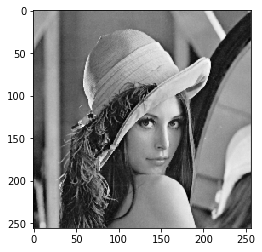

In [94]:
#cut-off Frequency = 120
LowPassCenter = center * gaussian_LowPass(120,lena.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.imshow(np.abs(inverse_LowPass), "gray")


# Question 2

In [95]:
def ideal_HighPass(D0, image_shape):
    new = np.ones(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2,cols/2)

    for v in range(cols):
        for u in range(rows):
            if distance((u,v), center) < D0:
                new[u,v] = 0
    return new


In [96]:
Ideal_high_pass = ideal_HighPass(50 , lena.shape)

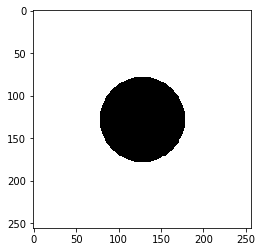

In [97]:
plt.imshow(Ideal_high_pass, cmap='gray')

In [106]:
original = np.fft.fft2(lena)
center = np.fft.fftshift(original)

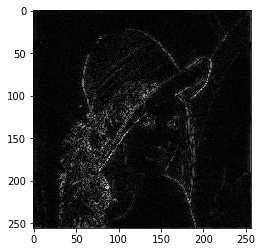

In [112]:
HighPassCenter = center * ideal_HighPass(60,lena.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


In [98]:
def butterworth_HighPass(D0,image_shape,n):      #n = order of filter
    new = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2,cols/2)
    
    for v in range(cols):
        for u in range(rows):
            new[u,v] = 1-1/(1+(distance((u,v), center)/D0)**(2*n))
    return new

In [100]:
butter_worth_highpass = butterworth_HighPass(50 , lena.shape , 5)

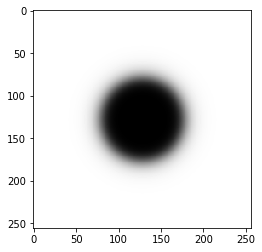

In [101]:
plt.imshow(butter_worth_highpass, cmap='gray')

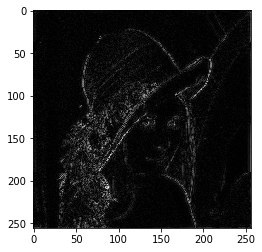

In [111]:
HighPassCenter = center * butterworth_HighPass(60,lena.shape,5)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")

In [102]:
def gaussian_HighPass(D0, image_shape):
    new = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2,cols/2)

    for v in range(cols):
        for u in range(rows):
            new[u,v] = 1 - np.exp(((-distance((u,v), center)**2)/(2*(D0**2))))
    return new

In [103]:
gaussian_high_pass = gaussian_HighPass(50 , lena.shape)

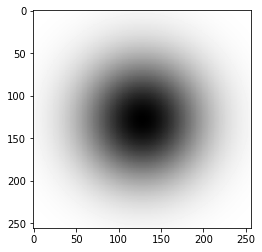

In [104]:
plt.imshow(gaussian_high_pass, cmap='gray')

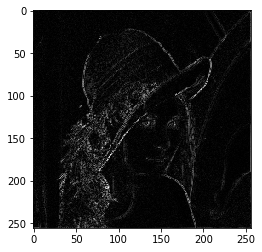

In [115]:
HighPassCenter = center * gaussian_HighPass(60,lena.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")

## 2.b Rigging Effect

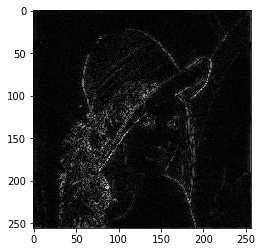

In [118]:
HighPassCenter = center * ideal_HighPass(60,lena.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")

## 2.C Comparing multiple butters worth filers with different cutoff frequencies

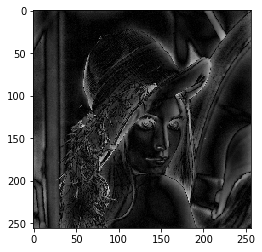

In [122]:
#Cut-off Frequency = 5
HighPassCenter = center * butterworth_HighPass(5,lena.shape,2)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


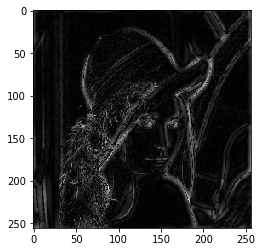

In [123]:
#Cut-off Frequency = 15
HighPassCenter = center * butterworth_HighPass(15,lena.shape,2)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


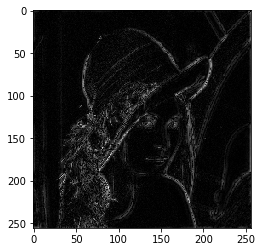

In [124]:
#Cut-off Frequency = 30
HighPassCenter = center * butterworth_HighPass(30,lena.shape,2)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


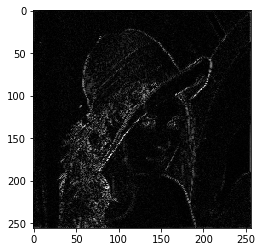

In [125]:
#Cut-off Frequency = 90
HighPassCenter = center * butterworth_HighPass(90,lena.shape,2)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


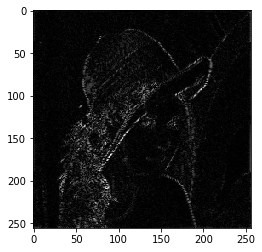

In [126]:
#Cut-off Frequency = 120
HighPassCenter = center * butterworth_HighPass(120,lena.shape,2)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


## 2.D Comparing multiple gaussian filers with different cutoff frequencies

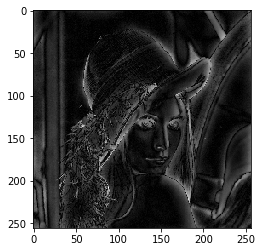

In [128]:
# Cutoff frequency = 5
HighPassCenter = center * gaussian_HighPass(5,lena.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


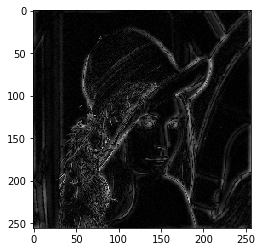

In [129]:
# Cutoff frequency = 15
HighPassCenter = center * gaussian_HighPass(15,lena.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


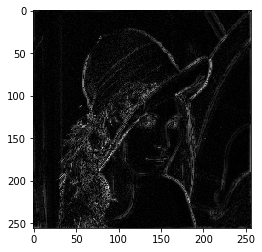

In [130]:
# Cutoff frequency = 30
HighPassCenter = center * gaussian_HighPass(30,lena.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


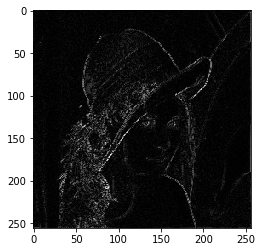

In [131]:
# Cutoff frequency = 90
HighPassCenter = center * gaussian_HighPass(90,lena.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


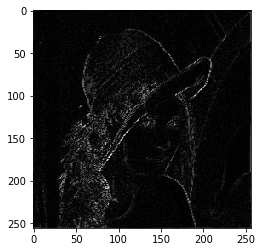

In [132]:
# Cutoff frequency = 120
HighPassCenter = center * gaussian_HighPass(120,lena.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray")


## THE END